In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils

In [20]:
df = pd.read_csv('summary/summarized_data.csv', index_col=['ViT Name'])
df["Accuracy"] = df["Accuracy"]/100

In [21]:
original_acc = df.filter(regex="ViT-Defa*", axis=0)["Accuracy"].item()
original_time = df.filter(regex="ViT-Defa*", axis=0)["Total Latency"].item()
original_mem = df.filter(regex="ViT-Defa*", axis=0)["Max Mem use"].item()

In [22]:
merging = [10, 15, 20, 25, 30, 5]
pruning = [0.1]*6 + [0.2]*6 + [0.3]*6 + [0.4]*6 + [0.5]*6 + [0.6]*6 + [0.7]*6 + [0.8]*6
pruning = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [23]:
name = "MQuantHeatmap"

In [24]:
combined = df.filter(regex='ViT-Combine-Mer.*$', axis=0)
print(combined)
combined["Pruning"] = merging
#combined["Merging"] = merging

                                 Accuracy  Max Mem use  Mem Latency  \
ViT Name                                                              
ViT-Combine-Merging10-Quantized     0.947   183.556152     0.207412   
ViT-Combine-Merging15-Quantized     0.943   183.343262     0.206288   
ViT-Combine-Merging20-Quantized     0.924   183.299316     0.203310   
ViT-Combine-Merging25-Quantized     0.900   183.255371     0.201542   
ViT-Combine-Merging30-Quantized     0.881   183.023438     0.205965   
ViT-Combine-Merging5-Quantized      0.949   183.242188     0.202321   

                                 Inference Latency  Total Latency  
ViT Name                                                           
ViT-Combine-Merging10-Quantized           5.681480       5.888892  
ViT-Combine-Merging15-Quantized           5.730487       5.936775  
ViT-Combine-Merging20-Quantized           5.713740       5.917050  
ViT-Combine-Merging25-Quantized           5.659542       5.861084  
ViT-Combine-Merging30-Q

/tmp/ipykernel_19021/1480538908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Pruning"] = merging


In [25]:
diff_latency = original_time - combined["Total Latency"]
diff_mem = original_mem - combined["Max Mem use"]
diff_acc = original_acc - combined["Accuracy"]

tradeoff_latency = (diff_latency/original_time)/(diff_acc/original_acc) * (combined["Accuracy"]**2)
tradeoff_mem = (diff_mem/original_mem)/(diff_acc/original_acc) * (combined["Accuracy"]**2)

combined["Values time"] = tradeoff_latency
combined["Values mem"] = tradeoff_mem

/tmp/ipykernel_19021/225011698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Values time"] = tradeoff_latency
/tmp/ipykernel_19021/225011698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Values mem"] = tradeoff_mem


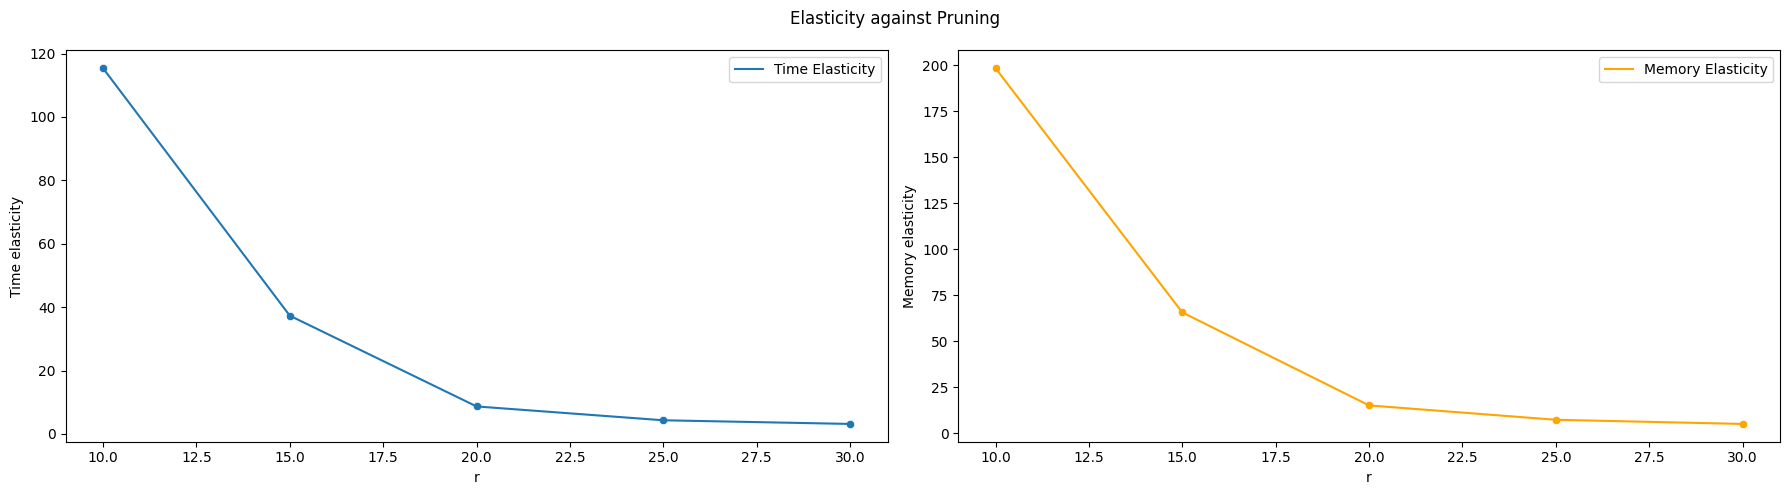

In [26]:
fig, axes = plt.subplots(1,2, figsize=(18, 5))
sns.lineplot(x=combined["Pruning"], y=tradeoff_latency, label="Time Elasticity",errorbar=None, ax=axes[0])
sns.scatterplot(x=combined["Pruning"], y=tradeoff_latency, ax=axes[0])
axes[0].set_ylabel("Time elasticity")
axes[0].set_xlabel("r")
axes[0].legend()

sns.lineplot(x=combined["Pruning"], y=tradeoff_mem ,errorbar=None, label="Memory Elasticity", ax=axes[1], color='orange')
sns.scatterplot(x=combined["Pruning"], y=tradeoff_mem, ax=axes[1], color='orange')
axes[1].set_ylabel("Memory elasticity")
axes[1].set_xlabel("r")
axes[1].legend()


fig.suptitle(f"Elasticity against Pruning")
plt.tight_layout()
plt.savefig(f"summary/globalGraphs/Combine/{name}-Elasticity.png")
plt.show()

/tmp/ipykernel_19021/3505495490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["Values average"] = (0.7*tradeoff_latency + 0.3*tradeoff_mem)/2


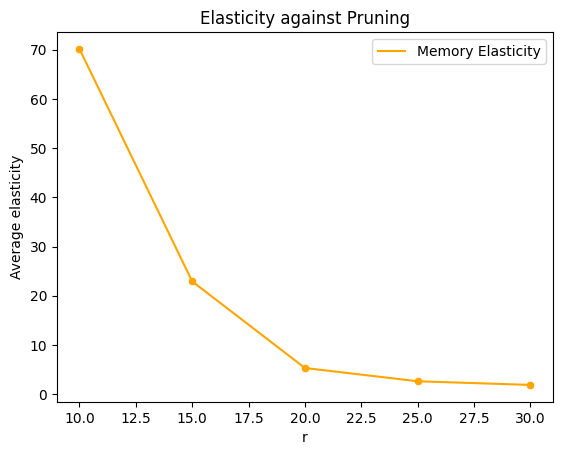

In [27]:
combined["Values average"] = (0.7*tradeoff_latency + 0.3*tradeoff_mem)/2
sns.lineplot(x=combined["Pruning"], y=combined["Values average"] ,errorbar=None, label="Memory Elasticity", color='orange')
sns.scatterplot(x=combined["Pruning"], y=combined["Values average"], color='orange')
plt.ylabel("Average elasticity")
plt.xlabel("r")
plt.legend()

plt.title(f"Elasticity against Pruning")
plt.savefig(f"summary/globalGraphs/Combine/{name}-Average.png")
plt.show()